In [10]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sqlite3
import shap
import scipy.stats as ss
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [11]:
merged_data = pd.read_csv("C:/Users/BingLesleyYuan/Desktop/UniProj/Project-90106-G28/cleaned_15_Sep.csv")
column_names= merged_data.columns
column_names=column_names[1:]
column_names

Index(['RecordType.Name', 'RICE_Supported__c', 'Actual_Close_Date__c',
       'Lead_Faculty__c', 'Lead_School__c', 'Parent_Opportunity__c',
       'Industry', 'Industry_Sub_Type__c', 'Business_Type__c',
       'Is_External(1)__c', 'ParentId', 'CloseYear', 'CloseMonth',
       'CreatedYear', 'CreatedMonth', 'time_length'],
      dtype='object')

In [12]:
X = merged_data.iloc[:, 1:].values
y = merged_data.iloc[:, 0].values

In [30]:
labelencoder_X = LabelEncoder()
recordtype=labelencoder_X.fit_transform(X[:,0]) 
X[:,0] = labelencoder_X.fit_transform(X[:,0]) 

X[:,1] = labelencoder_X.fit_transform(X[:,1]) 
X[:,3] = labelencoder_X.fit_transform(X[:,3])
X[:,4] = labelencoder_X.fit_transform(X[:,4])
X[:,6] = labelencoder_X.fit_transform(X[:,6])
X[:,7] = labelencoder_X.fit_transform(X[:,7])
X[:,8] = labelencoder_X.fit_transform(X[:,8])


labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4326, 16) (4326,)
Test (1082, 16) (1082,)


[0.75231054 0.71534196 0.66543438 0.68391867 0.69131238 0.68391867
 0.6857671  0.59334566 0.60555556 0.5537037 ]
Accuracy of Random Forest  Classifier on training set: 0.99
Accuracy of Random Forest Classifier on test set: 0.79
Feature: 0, Score: 0.07703
Feature: 1, Score: 0.04982
Feature: 2, Score: 0.00125
Feature: 3, Score: 0.12812
Feature: 4, Score: 0.09802
Feature: 5, Score: 0.01580
Feature: 6, Score: 0.04916
Feature: 7, Score: 0.08523
Feature: 8, Score: 0.08638
Feature: 9, Score: 0.00080
Feature: 10, Score: 0.02035
Feature: 11, Score: 0.03912
Feature: 12, Score: 0.12312
Feature: 13, Score: 0.04817
Feature: 14, Score: 0.12836
Feature: 15, Score: 0.04927


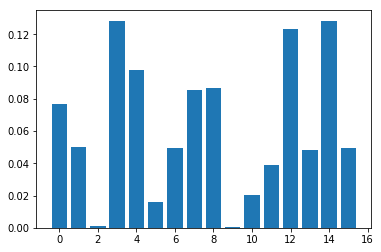

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
scores = cross_val_score(estimator=model, X=X, y=y, cv=10, n_jobs=4)
print(scores)
print('Accuracy of Random Forest  Classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [23]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(model)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


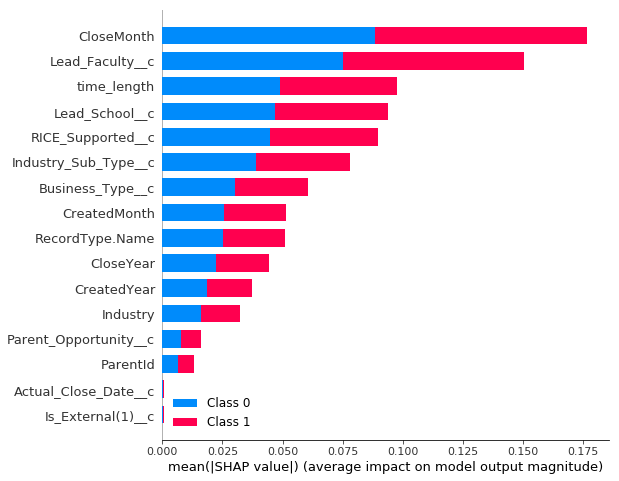

In [24]:
shap.initjs()

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features=X_train,feature_names=column_names)

[0.77449168 0.71534196 0.73937153 0.67652495 0.64879852 0.70055453
 0.70979667 0.61367837 0.61111111 0.44814815]
Accuracy of Random Forest  Classifier on training set: 0.79
Accuracy of Random Forest Classifier on test set: 0.77
Feature: 0, Score: 0.04636
Feature: 1, Score: 0.09552
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.19941
Feature: 4, Score: 0.07380
Feature: 5, Score: 0.12343
Feature: 6, Score: 0.03421
Feature: 7, Score: 0.07416
Feature: 8, Score: 0.05545
Feature: 9, Score: 0.01074
Feature: 10, Score: 0.02870
Feature: 11, Score: 0.03068
Feature: 12, Score: 0.08722
Feature: 13, Score: 0.02710
Feature: 14, Score: 0.03458
Feature: 15, Score: 0.07862


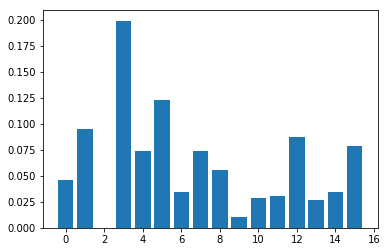

In [27]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
scores = cross_val_score(estimator=model, X=X, y=y, cv=10, n_jobs=8)
print(scores)
print('Accuracy of Random Forest  Classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


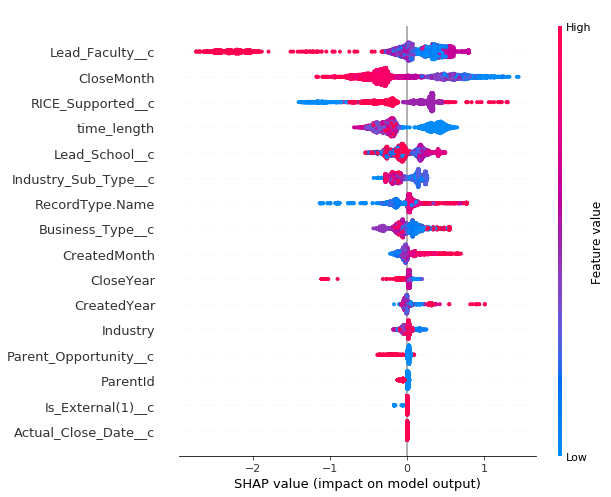

In [20]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features=X_train,feature_names=column_names)

In [32]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import style
import matplotlib.pyplot as plt
import random
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pickle

In [34]:
infile = open("C:/Users/BingLesleyYuan/Desktop/UniProj/Project-90106-G28/Raelene/model_1.pkl",'rb')
saved_model = pickle.load(infile)
infile.close()


AttributeError: Can't get attribute 'Net' on <module '__main__'>